# Project 4

In this project, you will summarize and present your analysis from Projects 1-3.

### Intro: Write a problem Statement/ Specific Aim for this project

Answer:  
Determine an asssociation with university admittance and graduate record exam scores,grade point average and prestige (a rank of the undergraduate institution) to predict the probablity of gaining a university place. 

### Dataset:  Write up a description of your data and any cleaning that was completed

Answer:  
The data is a sample of UCLA data which contains 400 observations and appears to be a snapshot of university admissions, with 1 binary outcome variable - admit, and 3 predictor variables; gpa, gre and prestige.  Prestige is a categorical variable describing the rank of college.  It is unclear if the dataset is aggregated (although it is assumed not)and the time period the data is captured from is unknown.   
To prepare the data for analysis...  
- Dummy variables were used to convert Prestige to a continuous data type which is suitable for regression techniques.  
- 3 records containing null values were found and removed from the data. 

  
  Variable | Description | Type of Variable
---| ---| ---
admit | Binary target variable, 0 = not admitted 1 = admitted | categorical
gre | Graduate Record Exam score between 220 and 800  (incs Nulls) | continuous 
gpa | grade point average between 2.26 and 4.00 (incs Nulls) | continuous 
prestige | This is the rank of an under grads previous college (aka alma mater) 1= high, 4= low| categorical 


In [136]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline

df_raw = pd.read_csv('../assets/admissions.csv')
df_raw = df_raw.dropna()

dummy = pd.get_dummies(df_raw.prestige,prefix ='prestige')
df = df_raw.ix[:,0:3].join(dummy)
len(df)

397

### Demo: Provide a table that explains the data by admission status

Mean (STD) or counts by admission status for each variable 

| Not Admitted | Admitted
---| ---|---
|Mean (std)|Mean (std)
GPA | 3.3 (0.38)  | 3.5 (0.37)
GRE |573 (116) | 618 (108)
|Freq (%)|Freq (%)
Prestige 1 | 28 (45.9%) | 33 (54.1%)
Prestige 2 | 97 (64.7%) | 53 (35.3%)
Prestige 3 |93 (76.9%) | 28 (23.1%)
Prestige 4 |55 (82.1%) | 12 (17.9%)

### Methods: Write up the methods used in your analysis

Answer: For the Mean and STD I used a group by function to pivot the data by admit/ not admit, and then transposed it to produce the same shape as the table above. For the frequency I used a pandas crosstab.  
More broadly...  

- acquire and clean the data 
- calculate new variables, such as dummies or ratios. 
- check the distribution of each of the features, using mean, median, std and skew - are they normally distributed?
- check for outliers and how best to handle them.
- use crosstabs/ frequencies to get a sense of the odds for and against the outcome.


### Results: Write up your results

Answer: Admitted and not admitted share a similar distribution for the GPA variable.  Whilst gre shows more variance; those admitted to university are more likely to have a higher gre score (on average 618 vs 573).  
As prestige rank increases the proportion being admitted to university decreases (from 54% to 18%).

### Visuals: Provide a table or visualization of these results

In [95]:
print ('Std Dev')
print( df.groupby(df.admit).std().T)

Std Dev
admit                  0           1
gre           116.052798  108.884884
gpa             0.376773    0.371655
prestige_1.0    0.303946    0.440285
prestige_2.0    0.479487    0.495070
prestige_3.0    0.474801    0.416207
prestige_4.0    0.401831    0.293665


Mean
admit                  0           1
gre           573.579336  618.897638
gpa             3.345404    3.489206
prestige_1.0    0.102564    0.259843
prestige_2.0    0.355311    0.417323
prestige_3.0    0.340659    0.220472
prestige_4.0    0.201465    0.094488



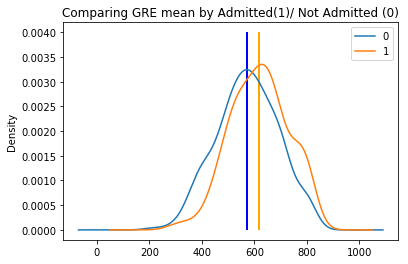

In [98]:
print ('Mean')
print( df.groupby(df.admit).mean().T) ## Couldn't figure out how to only select gre and gpa here?
print()
df['gre'].groupby(df.admit).plot( kind= 'density', legend = True, title = 'Comparing GRE mean by Admitted(1)/ Not Admitted (0)')
plt.vlines(df['gre'][df.admit ==1].mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.004,
           linewidth=2.0,
          color ='orange')

plt.vlines(df['gre'][df.admit !=1].mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.004,
           linewidth=2.0,
          color = 'blue')

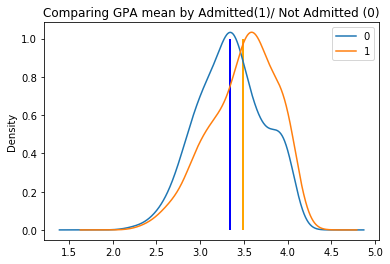

In [100]:
df['gpa'].groupby(df.admit).plot( kind= 'density', legend = True, title = 'Comparing GPA mean by Admitted(1)/ Not Admitted (0)')
plt.vlines(df['gpa'][df.admit ==1].mean(),     # Plot black line at mean
           ymin=0, 
           ymax=1,
           linewidth=2.0,
          color ='orange')

plt.vlines(df['gpa'][df.admit !=1].mean(),     # Plot black line at mean
           ymin=0, 
           ymax=1,
           linewidth=2.0,
          color = 'blue')

In [133]:
print('Freq')
print(pd.crosstab(df_raw.prestige, df_raw.admit))
print()
print('Freq %')
print(pd.crosstab(df_raw.prestige, df_raw.admit).apply(lambda r: r/r.sum(), axis=1))

Freq
admit      0   1
prestige        
1.0       28  33
2.0       97  53
3.0       93  28
4.0       55  12

Freq %
admit            0         1
prestige                    
1.0       0.459016  0.540984
2.0       0.646667  0.353333
3.0       0.768595  0.231405
4.0       0.820896  0.179104


<img src='placeholder.png' height= 25% width= 25%>

<img src='placeholder.png' height= 25% width= 25%>

### Discussion: Write up your discussion and future steps

Answer:  
As the outcome is binary, I would use a logistic regression model to prove the following hypothesis is true:  
There is an association between the outcome and the predictors. For instance, those who studied at higher ranked colleges are more likely to be admitted to university.  

Next steps...  
- identify the model which best fits the problem - categorical/ continuous outcome?
- test for correlation between the predictor/s and outcome variable 
- test for multicolinearity between the predictors 
- refine the data set to the features you want to include in the model.
- build the model on the learn dataset
- test the model against the test dataset
- calculate confusion matrix and auc to evaluate the model/s. 
